# Material based on lecture (30/06/2017)
---

In [40]:
import numpy as np
import seaborn.apionly as sns
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

---
## Exercise on Slide 11 
---
Here we are asked to tidy the country populations dataset `country_populations_by_year.csv` and use the tidied version to make a line plot of populations of China and India by year using `sns.pointplot`. 


--- 
Let's have a look and argue why this is not a tidy dataset. As shown below, we have 2 "indexing columns", namely `"Country Name"` and `"Country Code"`. 

In [2]:
country_pop_df = pd.read_csv("./mbs-datasets/country_populations_by_year.csv")
country_pop_df.head()

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
0,Afghanistan,AFG,9671046,9859928.0,10056480.0,10261254.0,10474903.0,10697983,10927724.0,11163656.0,...,26697430.19,27465525.27,28255718.73,29068646.36,29904962.21,30751661.41,31622333.2,32517656.32,33438328.72,34385068.12
1,Albania,ALB,1610565,1661158.0,1712563.0,1764593.0,1817098.0,1869942,1922993.0,1976140.0,...,3077378.00,3089778.00,3106701.00,3124861.00,3141800.00,3156607.00,3169665.0,3181397.00,3192723.00,3204284.00
2,Algeria,DZA,10799997,11006643.0,11209845.0,11420845.0,11654905.0,11923002,12229853.0,12572629.0,...,30982214.00,31441848.00,31913462.00,32396048.00,32888449.00,33391954.00,33906605.0,34428028.00,34950168.00,35468208.00
3,American Samoa,ASM,20041,20500.0,21124.0,21870.0,22672.0,23480,24283.0,25087.0,...,58633.00,59687.00,60774.00,61871.00,62962.00,64045.00,65130.0,66217.00,67312.00,68420.00
4,Andorra,AND,13377,14337.0,15337.0,16373.0,17438.0,18529,19640.0,20772.0,...,66390.00,69043.00,72203.00,75292.00,77888.00,79874.00,81390.0,82577.00,83677.00,84864.00


---
It is useful to ask the following questions to detect when a dataset is **not** tidy: 

  1. Are the columns made up of "variables"? (Yes, for tidy data)
     - For this dataset, yes. Aside from the indexing columns, the other columns are variable of the form "population in the year X". 
  2. Are the rows independent observations? (Yes, for tidy data)
     - Yes, they are observations of the population for each country from the year 1960 to 2010. 
  3. Can I come up with a "metavariable" which summarise the columns? (NO, for tidy data!) 
     - Yes! Namely: "Year". This is a clear case where melting is needed. 

In [3]:
melted_country_pop_df = country_pop_df.melt(id_vars=["Country Name",  "Country Code"], 
                                            value_vars=["%s" % year for year in range(1960, 2011)], 
                                            value_name="Population Size", 
                                            var_name="Year")

# It will be much easier if the `"Country Name"` column is the index of the dataframe. 
melted_country_pop_df.set_index("Country Name", inplace=True) 
melted_country_pop_df.sample(10)

,Country Code,Year,Population Size
Country Name,,,
"Macao SAR, China",MAC,1974,250548.0
American Samoa,ASM,1978,31139.0
Costa Rica,CRI,1990,3070240.0
Jordan,JOR,2008,5787000.0
Cambodia,KHM,1967,6485769.0
Mali,MLI,1976,6725776.0
France,FRA,1987,57267262.0
Burkina Faso,BFA,1967,5479285.0
Cuba,CUB,1999,11068382.0


---
And now the tools for generating line plot works out of the box for this tidied dataset. Let's slice out (row slicing) China and India's part of the dataframe to visualise. 

In [4]:
# This says: Give me all the rows with index "China" or "India" and generate a random sample of 10 rows. 
melted_country_pop_df.loc[["China", "India"], :].sample(10) 

,Country Code,Year,Population Size
Country Name,,,
China,CHN,1970,8.183150e+08
China,CHN,1976,9.306850e+08
India,IND,1998,9.821825e+08
India,IND,1975,6.134590e+08
China,CHN,2009,1.331380e+09
China,CHN,1973,8.819400e+08
India,IND,1994,9.156970e+08
India,IND,2005,1.094583e+09
India,IND,1967,5.107086e+08


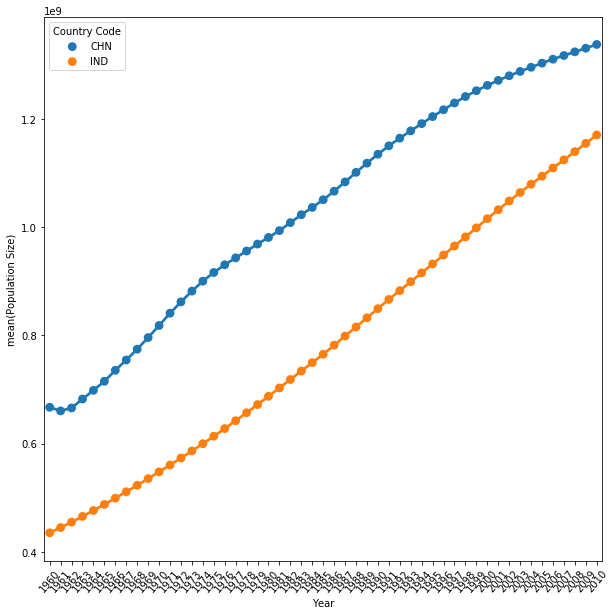

In [5]:
fig, ax = plt.subplots(1, 1, figsize = (10, 10)) # I like my plots to be big. 

sns.pointplot(data=melted_country_pop_df.loc[["China", "India"], :],
              x="Year", 
              y="Population Size", 
              hue="Country Code", 
              ax=ax) # Use the axis created above

ax.set_xticklabels(ax.get_xticklabels(), rotation=50); # Rotate the xaxis label so that they don't overlap

### The same exercise with `peak_sunlight_hours.csv`
---
tidy the peak sunlight hours dataset, then use that to make a line plot of sunlight hours for all Australian cities.

In [8]:
peak_sun_df = pd.read_csv("./mbs-datasets/peak_sunlight_hours.csv", 
                          skiprows=1) # skipping the first row in the file. 
peak_sun_df.sample(5)

,City,Country or US State,January,February,March,April,May,June,July,August,September,October,November,December
42,Los Angeles,California,2.87,3.86,4.76,5.99,6.57,6.78,7.00,6.61,5.15,4.17,3.22,2.72
37,Chicago,Illinois,1.76,2.59,3.55,4.80,5.98,6.29,6.38,5.16,4.19,3.04,1.83,1.40
6,Singapore,Singapore,4.66,4.92,4.99,4.66,4.29,4.21,4.34,4.39,4.52,4.35,3.86,4.00
43,Seattle,Washington,0.92,1.65,2.88,4.04,5.47,6.06,6.23,4.99,3.85,2.09,1.15,0.74
30,Copenhagen,Denmark,0.40,1.04,2.32,3.90,5.05,6.07,5.31,4.48,2.88,1.48,0.63,0.35


In [17]:
# Obtaining the month names. 
import calendar
month_names = list(calendar.month_name)[1:]

melted_peak_sun_df = peak_sun_df.melt(id_vars=["City", "Country or US State"], 
                                      value_vars = month_names, 
                                      value_name="peak sun hour", 
                                      var_name="Month")
melted_peak_sun_df.sample(5)

,City,Country or US State,Month,peak sun hour
118,Pretoria,South Africa,March,5.63
226,Rome,Italy,May,6.02
538,Moscow,Russia,November,0.51
59,Kagoshima,Japan,February,2.77
315,Akita,Japan,July,4.86


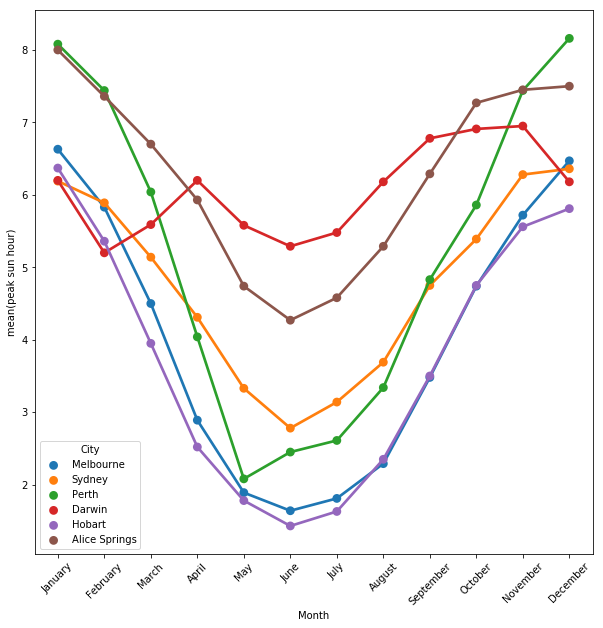

In [25]:
fig, ax = plt.subplots(1, 1, figsize = (10, 10))  

sns.pointplot(data=melted_peak_sun_df.loc[melted_peak_sun_df["Country or US State"] == "Australia", :],
              x="Month", 
              y="peak sun hour", 
              hue="City", 
              ax=ax) # Use the axis created above

ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

---
## Exercise on Slide 26 
---
We aim to visualise the `"asteroid-belt.csv"` dataset. Here we are combining 2 Gestalt's principles: 

   1. Similarity 
      - In our case, similarity in colors. However, those colors signify something physical, namely, the chemical composition of the asteriod. 
   2. Proximity
      - Distance in physical space, charted by the (polar-like) coordinate "Distance from Sun" and "orbital inclination". 
      
This visualisation will help us to infer how asteroids of similar chemical composition distribute in the asteroid belt. We shall first refer to and intepret what the original analysis achieved. Please refer to the comments in the code and the discussion afterwards.  

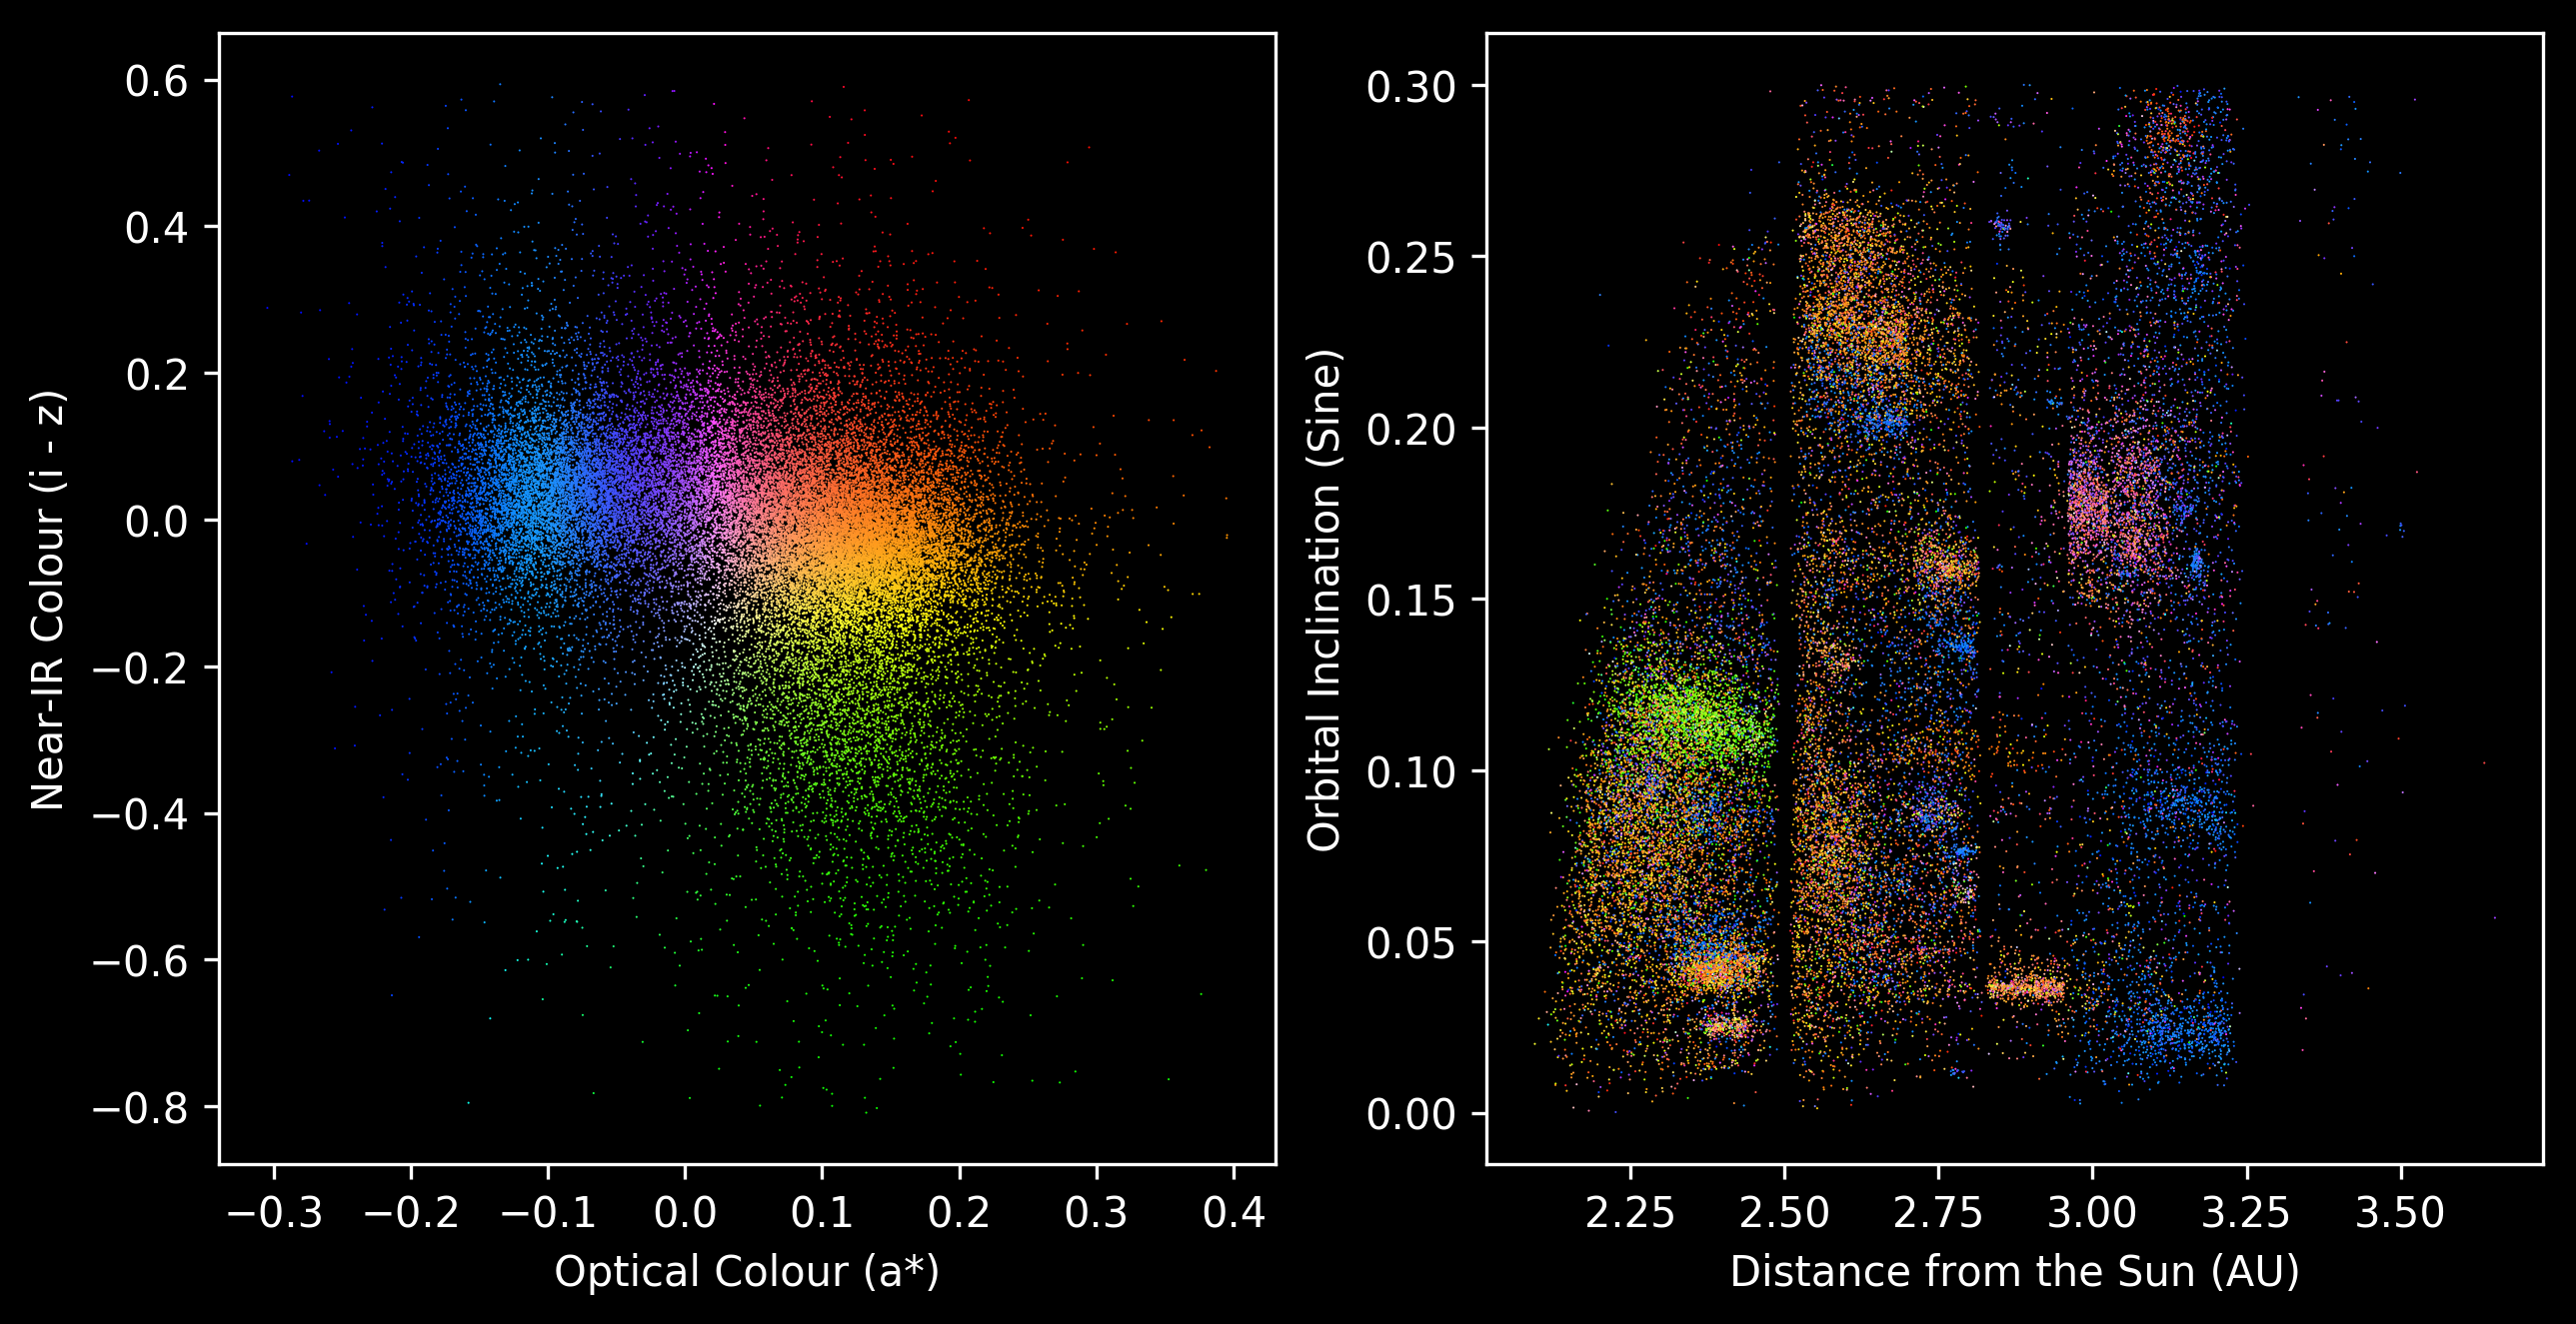

In [38]:
# Reading the data. 
# Some processing were performed here. We shall not concern ourselves with them. 
# The important thing is that we obtain 5 quantities: `mag_a`, `mag_i`, `mag_z`, `a` and `sini`.
asteroid_df = pd.read_csv('./mbs-datasets/asteroid-belt.csv')
nrows = asteroid_df.shape[0]
mag_a = asteroid_df['mag_a'] - 0.005 + 0.01 * np.random.random(size=nrows)
mag_i = asteroid_df['mag_i'] - 0.005 + 0.01 * np.random.random(size=nrows)
mag_z = asteroid_df['mag_z'] - 0.005 + 0.01 * np.random.random(size=nrows)
a = asteroid_df['aprime']
sini = asteroid_df['sin_iprime']


# This is a colour assignment to the "mag_a", "mag_i - mag_z" space
# derived from expert knowledge regarding chemical composition and optical data. 
# We will ignore the actual implementation and 
# focus on intepreting the scatter plot of the color distribution later.
def compute_color(mag_a, mag_i, mag_z, a_crit=-0.1):
    """
    Compute the scatter-plot color using code adapted from
    TCL source used in Parker 2008.
    """
    # define the base color scalings
    red = np.ones_like(mag_i)
    green = 0.5 * 10 ** (-2 * (mag_i - mag_z - 0.01))
    blue = 1.5 * 10 ** (-8 * (mag_a + 0.0))

    # enhance green beyond the a_crit cutoff
    green += 10. / (1 + np.exp((mag_a - a_crit) / 0.02))

    # normalize color of each point to its maximum component
    rgb = np.vstack([red, green, blue])
    rgb /= np.max(rgb, axis=0)

    # return an array of RGB colors, which is shape (n_points, 3)
    return rgb.T



# compute RGB color based on magnitudes
color_manual = compute_color(mag_a, mag_i, mag_z)

#------------------------------------------------------------
# set up the plot
with plt.style.context('dark_background'): # Provide the style context where the background is black.
    fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5), dpi=300)
    ax0.scatter(mag_a, mag_i - mag_z, c=color_manual, s=0.25, linewidth=0)

    ax0.set_xlabel('Optical Colour (a*)')
    ax0.set_ylabel('Near-IR Colour (i - z)')

    # plot the orbital parameters plot
    ax1.scatter(a, sini, c=color_manual, s=0.25, linewidth=0)
    ax1.set_xlabel('Distance from the Sun (AU)')
    ax1.set_ylabel('Orbital Inclination (Sine)')

---
So two plots are generated: 

  1. The first one is the scatter plot of the 2 quantities "mag_a" and "mag_i - mag_z" space. Lets call this space the "optical space". 
      - This plot tells us that our datapoints forms an L shape like cluster around the origin. 
      - The color assignment generated via `compute_color` is angular, i.e. the color varies (very roughly) according to the angle from the x-axis. 
  2. The second plot gives plot the points in physical space with polar-like coordinate, with the asteroids colors corresponding to their chemical composition as assigned in the optical space plot. 

---
Our tasks now is to generate another color assignment in the optical space that is qualitatively similar, yet requires no expert knowledge. The quality we want to mimick is that the color distribution is angular. So we shall use `arctan` function which return values (after normalisation) in [0, 1] that is a function of the angle from the x-axis. 

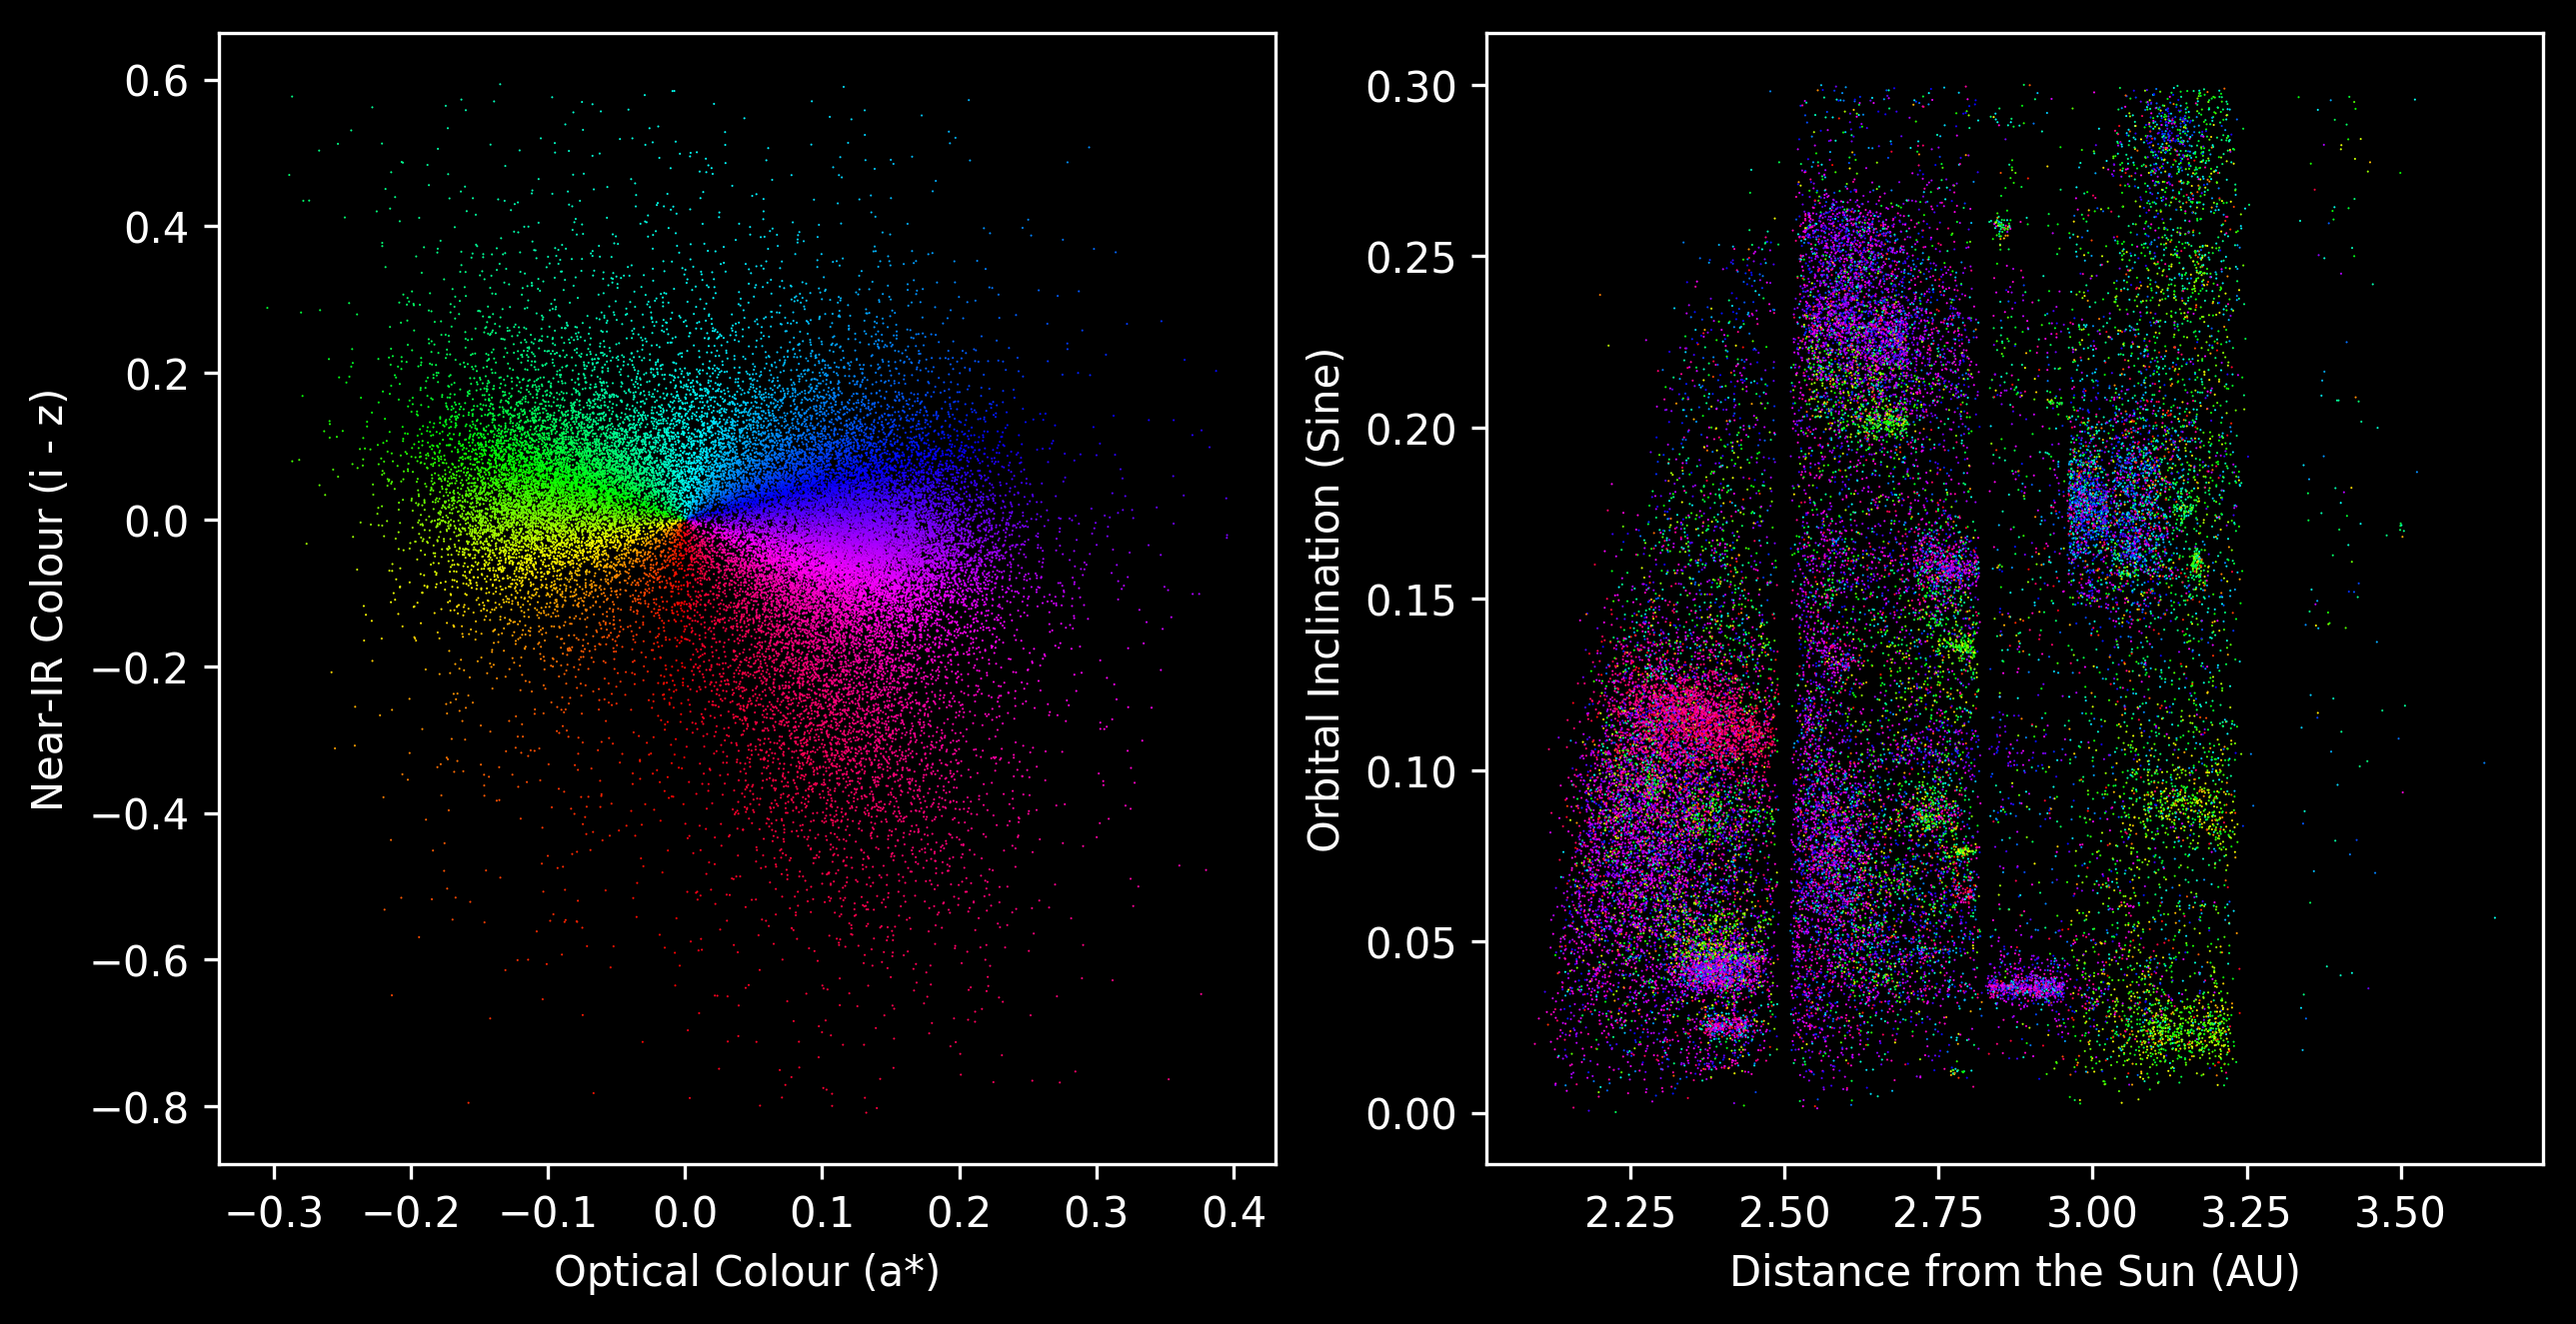

In [39]:
def compute_color2(mag_a, mag_i, mag_z):
    # obtaining x, y coordinate
    y = mag_i - mag_z 
    x = mag_a 
    
    # compute a singed angle. 
    # The function is aware of which quadrant the coordinates are in and return the resulting angle accordingly. 
    angle = np.arctan2(x, y) 
    
    # normalise to ensure values lies between 0 and 1
    angle = (angle - angle.min()) / (angle.max() - angle.min())
    color = plt.cm.hsv(angle) # just some color map of your choice. 
    return color

# And we shall generate the same plot but with our own color assignment 
new_colors = compute_color2(mag_a, mag_i, mag_z)


with plt.style.context('dark_background'): # Provide the style context where the background is black.
    fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5), dpi=300)
    ax0.scatter(mag_a, mag_i - mag_z, c=new_colors, s=0.25, linewidth=0)

    ax0.set_xlabel('Optical Colour (a*)')
    ax0.set_ylabel('Near-IR Colour (i - z)')

    # plot the orbital parameters plot
    ax1.scatter(a, sini, c=new_colors, s=0.25, linewidth=0)
    ax1.set_xlabel('Distance from the Sun (AU)')
    ax1.set_ylabel('Orbital Inclination (Sine)')

---
## Tidying Journal dataset
---
(FIXME incomplete) Illustrating melting with Pandas Multi-index

In [41]:
journal_df = pd.read_excel("./mbs-datasets/Journal_publishing_cost_FOIs_UK_universities.xlsx", 
                           header=[0, 1])
journal_df.reset_index(inplace=True)
journal_df.drop( ('Total for these 10 publishers', 'Unnamed: 0_level_1'), axis=1, inplace=True)
#print(journal_df.columns.tolist()[:5])
#print(journal_df.head())


melted_journal_df = journal_df.melt(id_vars= [('index', '')], 
                                    value_vars=journal_df.columns.tolist()[1:], 
                                    var_name=["Publisher", "Year"],
                                    value_name='count').set_index(('index', ''))
melted_journal_df.sample(10)

,Publisher,Year,count
"(index, )",,,
University of Cumbria,Institute of Physics Publishing,2011,300.00
King's College London,Wiley,2010,373614.79
University of Winchester,Institute of Physics Publishing,2014,0.00
Aston University,Wiley,2014,7047.83
University of Chester,Springer,2011,0.00
University of South Wales,Elsevier,2011,155881.00
University of Bristol,Nature Publishing Group,2013,105004.00
Leeds College of Art,Elsevier,2014,0.00
Leeds Trinity University,Sage,2011,9143.95
